In [ ]:
# Pranav Venkatesh - pranavmvp@gmail.com - 9003119787
# Flight Prices Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [2]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Test_set.xlsx')

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [7]:
train.dropna(inplace=True)

In [8]:
train['Journey_Day'] = pd.to_datetime(train['Date_of_Journey'],format="%d/%m/%Y").dt.day
train['Journey_Month'] = pd.to_datetime(train['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [9]:
train.drop('Date_of_Journey',inplace=True,axis=1)

In [10]:
train['Dep_Hour'] = pd.to_datetime(train['Dep_Time']).dt.hour
train['Dep_Minute'] = pd.to_datetime(train['Dep_Time']).dt.minute

train['Arr_Hour'] = pd.to_datetime(train['Arrival_Time']).dt.hour
train['Arr_Minute'] = pd.to_datetime(train['Arrival_Time']).dt.minute

train.drop('Dep_Time',inplace=True,axis=1)
train.drop('Arrival_Time',inplace=True,axis=1)


In [11]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [12]:
duration = list(train['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]

In [13]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [14]:
train_copy = train
total_duration = []
new_duration_hours = []

In [15]:
for x in duration_hours:
    new_duration_hours.append(int(x*60))

In [16]:
for i in range(0,len(new_duration_hours)):
               total_duration.append(new_duration_hours[i] + duration_mins[i])

In [17]:
train['Total Duration'] = total_duration

In [18]:
train.drop('Duration',axis=1,inplace=True)

In [19]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute,Total Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,285


In [20]:
train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

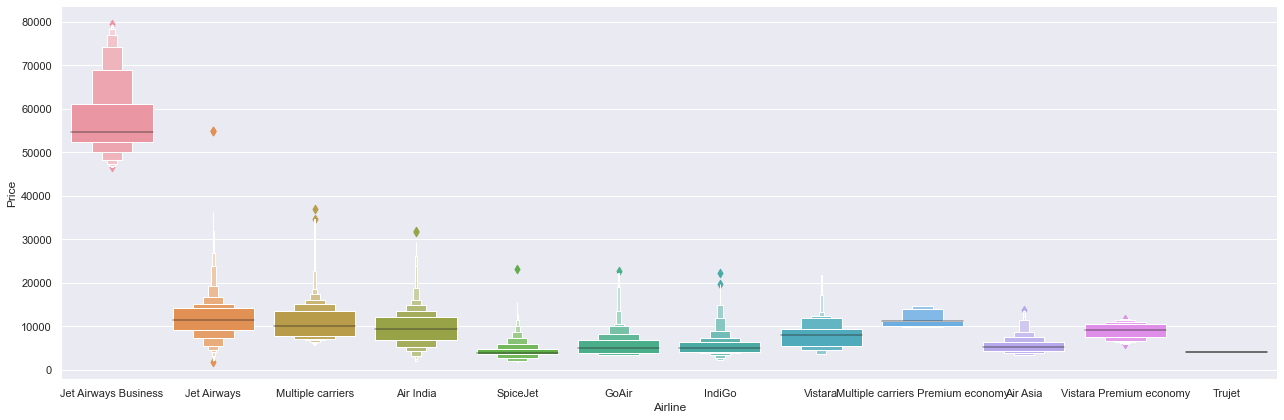

In [21]:
sns.catplot(y = "Price", x = "Airline", data = train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [22]:
air = train['Airline']
air = pd.get_dummies(air,drop_first=True)

In [23]:
air.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [24]:
train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

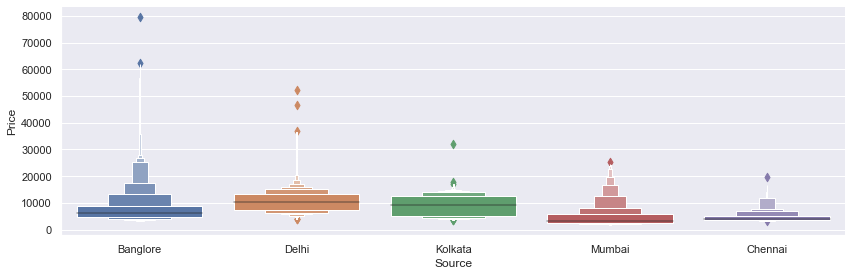

In [25]:
sns.catplot(y = "Price", x = "Source", data = train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [26]:
src = train['Source']
src = pd.get_dummies(src,drop_first=True)

In [27]:
src.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [28]:
src.columns = ['SRC_Chennai','SRC_Delhi','SRC_Kolkata','SRC_Mumbai']

In [29]:
train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [30]:
dest = train['Destination']
dest = pd.get_dummies(dest,drop_first=True)

In [31]:
dest.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [32]:
dest.columns = ['DEST_Cochin','DEST_Delhi','DEST_Hyderabad','DEST_Kolkata','DEST_New Delhi']

In [33]:
train.drop(['Route',"Additional_Info"],axis=1,inplace=True)

In [34]:
train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [36]:
train = pd.concat([train,air,src,dest], axis=1)
train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [37]:
train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute,Total Duration,Air India,...,Vistara Premium economy,SRC_Chennai,SRC_Delhi,SRC_Kolkata,SRC_Mumbai,DEST_Cochin,DEST_Delhi,DEST_Hyderabad,DEST_Kolkata,DEST_New Delhi
0,0,3897,24,3,22,20,1,10,170,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,445,1,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,1140,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,325,0,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,285,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
train.shape

(10682, 29)

In [39]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [40]:
test['Journey_Day'] = pd.to_datetime(test['Date_of_Journey'],format="%d/%m/%Y").dt.day
test['Journey_Month'] = pd.to_datetime(test['Date_of_Journey'],format="%d/%m/%Y").dt.month

test.drop('Date_of_Journey',inplace=True,axis=1)

test['Dep_Hour'] = pd.to_datetime(test['Dep_Time']).dt.hour
test['Dep_Minute'] = pd.to_datetime(test['Dep_Time']).dt.minute

test['Arr_Hour'] = pd.to_datetime(test['Arrival_Time']).dt.hour
test['Arr_Minute'] = pd.to_datetime(test['Arrival_Time']).dt.minute

test.drop('Dep_Time',inplace=True,axis=1)
test.drop('Arrival_Time',inplace=True,axis=1)

duration = list(test['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

test_copy = test
total_duration = []
new_duration_hours = []

for x in duration_hours:
    new_duration_hours.append(int(x*60))

for i in range(0,len(new_duration_hours)):
               total_duration.append(new_duration_hours[i] + duration_mins[i])

test['Total Duration'] = total_duration

In [41]:
air = test['Airline']
air = pd.get_dummies(air,drop_first=True)

In [42]:
src = test['Source']
src = pd.get_dummies(src,drop_first=True)

In [43]:
src.columns = ['SRC_Chennai','SRC_Delhi','SRC_Kolkata','SRC_Mumbai']

In [44]:
dest = test['Destination']
dest = pd.get_dummies(dest,drop_first=True)

In [45]:
dest.columns = ['DEST_Cochin','DEST_Delhi','DEST_Hyderabad','DEST_Kolkata','DEST_New Delhi']

In [46]:
test.drop(['Route',"Additional_Info"],axis=1,inplace=True)

test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

test = pd.concat([test,air,src,dest], axis=1)
test.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [47]:
test.shape

(2671, 28)

In [49]:
X = train.drop('Price',axis=1)
Y = train['Price']

In [55]:
train_feat = train[['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Minute', 'Arr_Hour', 'Arr_Minute', 'Total Duration']]

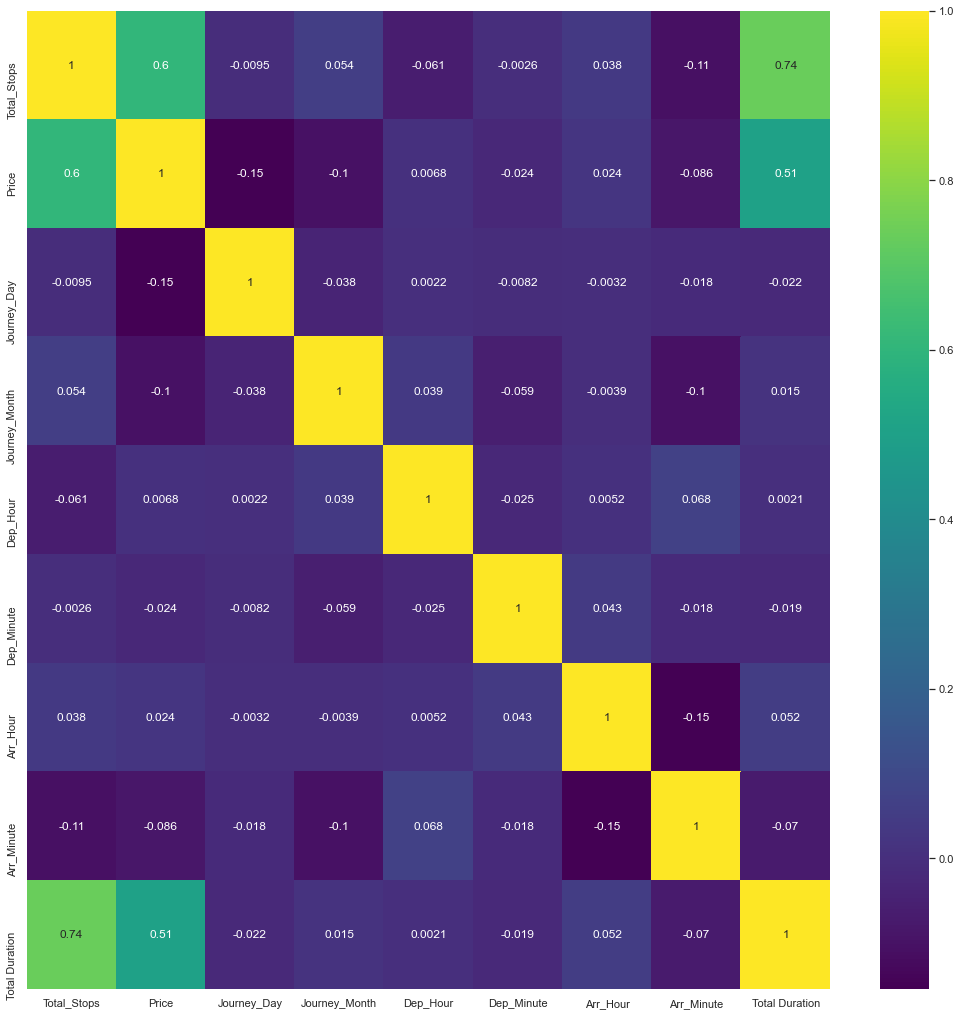

In [57]:
plt.figure(figsize=(18,18))
sns.heatmap(data=train_feat.corr(),annot=True,cmap='viridis')

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [59]:
random = RandomForestRegressor()
extra_tree = ExtraTreesRegressor()

In [60]:
extra_tree.fit(X,Y)

ExtraTreesRegressor()

In [61]:
print(extra_tree.feature_importances_)

[2.41398799e-01 1.44651947e-01 5.34628637e-02 2.68310260e-02
 2.52088995e-02 2.89320055e-02 2.23746361e-02 9.58085380e-02
 1.07720850e-02 2.02649852e-03 1.79810266e-02 1.43399635e-01
 6.75804925e-02 1.79910204e-02 8.09962290e-04 3.32535507e-03
 1.05285670e-04 5.27199443e-03 6.82197631e-05 4.46178805e-04
 1.09238499e-02 3.13040118e-03 8.02866078e-03 1.65428760e-02
 1.97975628e-02 7.54523205e-03 5.37972082e-04 2.50469770e-02]


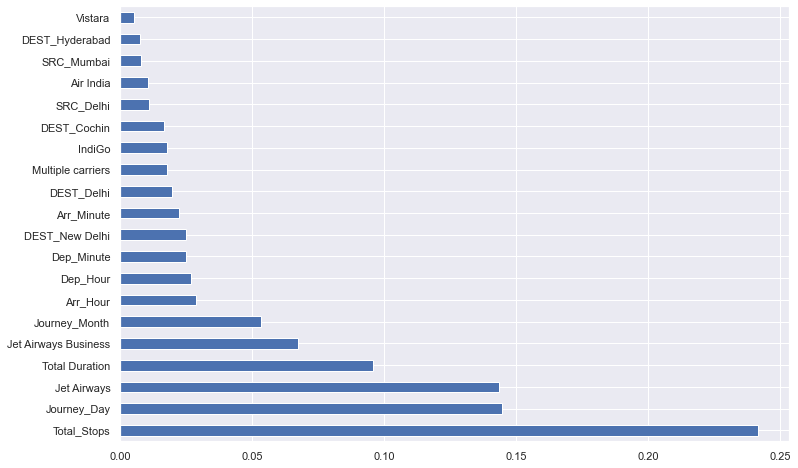

In [63]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(extra_tree.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
X_Train , X_Test , Y_Train, Y_Test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [65]:
random.fit(X_Train,Y_Train)

RandomForestRegressor()

In [66]:
predictions = random.predict(X_Test)

In [67]:
random.score(X_Train,Y_Train)

0.9527914070605451

In [68]:
random.score(X_Test,Y_Test)

0.8219563683248323

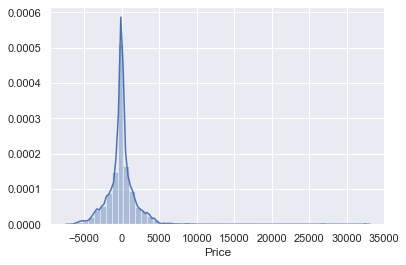

In [69]:
sns.distplot(Y_Test-predictions)

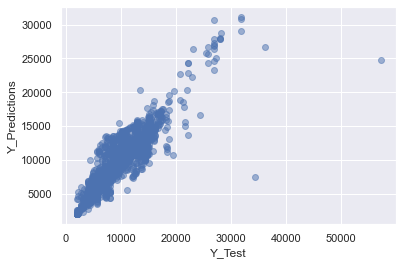

In [71]:
plt.scatter(Y_Test,predictions, alpha = 0.5)
plt.xlabel("Y_Test")
plt.ylabel("Y_Predictions")
plt.show()

In [77]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,confusion_matrix,classification_report,r2_score

In [78]:
print(mean_absolute_error(Y_Test,predictions))
print(mean_squared_error(Y_Test,predictions))
print(np.sqrt(mean_squared_error(Y_Test,predictions)))
print(r2_score(Y_Test,predictions))

1161.999094275025
3838986.814338281
1959.3332576002176
0.8219563683248323


In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

min_samples_split = [2, 5, 10, 15, 100]

min_samples_leaf = [1, 2, 5, 10]

In [85]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [87]:
tuned_random = RandomizedSearchCV(estimator = random, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [88]:
tuned_random.fit(X_Train,Y_Train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [89]:
tuned_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [91]:
tuned_prediction = tuned_random.predict(X_Test)

In [92]:
print(mean_absolute_error(Y_Test,predictions))
print(mean_squared_error(Y_Test,predictions))
print(np.sqrt(mean_squared_error(Y_Test,predictions)))
print(r2_score(Y_Test,predictions))

1161.999094275025
3838986.814338281
1959.3332576002176
0.8219563683248323


In [93]:
print(mean_absolute_error(Y_Test,tuned_prediction))
print(mean_squared_error(Y_Test,tuned_predictions))
print(np.sqrt(mean_squared_error(Y_Test,tuned_prediction)))
print(r2_score(Y_Test,tuned_prediction))

1148.356335622195
3566642.3917205264
1888.5556363847284
0.8345870941945432
